## Notebook 4: Was there a home court advantage in the basketball bubble?
-------------------------
<br>

**By the end of this notebook, you should be able to**:
- Answer the question whether there is a home court advantage in basketball
- Simulate the null hypothesis
- Visualize the results of the simulation
- Calculate and interpret a p-value
<br><br>


During the early days of the Covid-19 pandemic, the NBA tried to finish out the season by hosting 88 games at Disney World where players and staff were quarantined and tested regularly. They tried to recreate the atmosphere of a home court advantage for a team selected randomly as the "home" team for each game using virtual cheerleaders, fans and sounds from the team's real home court.

If there was no home court advantage, we would expect the home team to win about 44 of the 88 games (50%). Suprisingly, the "home" team won 49 of the 88 games (56%). Does this suggest that there was a real home court advantage?

<br>

<img src = "https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/basketball.png?raw=true" width="600"/>





<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width= 20px/> <font size=4> **Journal 4a_A:** What do you think?</font>

**Based on the information provided, do you think there was a home court advantage for the "home" teams in the bubble? Why or why not?**

> Write your answer here!

In [1]:
# Load our Pandas, NumPy and Matplotlib data science libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Simulating One Season

We approach this question assuming that the null hypothesis is true: **there was not a home court advantage**. In this world, there is no difference between playing at home or away -- the home team has a 50% chance of winning each game. Let's simulate one 88-game season in a world where there is no home court advantage.

In [2]:
# Set the number of games in a season
number_games = 88

# Give the choices that will be randomly picked from
game = np.array(['win', 'loss'])

# Store the results in the 'season' list (called an array in NumPy)
season = np.random.choice(game, number_games)
season

array(['loss', 'loss', 'win', 'loss', 'win', 'loss', 'loss', 'loss',
       'win', 'win', 'win', 'loss', 'loss', 'win', 'loss', 'win', 'win',
       'loss', 'loss', 'loss', 'win', 'win', 'loss', 'win', 'loss', 'win',
       'win', 'loss', 'win', 'win', 'win', 'win', 'loss', 'win', 'win',
       'loss', 'loss', 'win', 'loss', 'win', 'win', 'win', 'win', 'win',
       'loss', 'win', 'win', 'win', 'loss', 'loss', 'win', 'loss', 'loss',
       'loss', 'loss', 'loss', 'win', 'win', 'loss', 'loss', 'loss',
       'win', 'win', 'win', 'loss', 'loss', 'loss', 'loss', 'win', 'loss',
       'win', 'win', 'loss', 'win', 'loss', 'loss', 'win', 'win', 'win',
       'loss', 'win', 'win', 'win', 'win', 'win', 'win', 'loss', 'loss'],
      dtype='<U4')

In [3]:
# Count the number of times "win" appears in the season list
home_team_wins = np.count_nonzero(season == 'win')
home_team_wins

47

## Visualizing the Data

We can visualize the results of our simulation using a **histogram** which divides the possible outcomes (the number of games won by the home team) into "bins". Each bin counts the number of seasons with a certain number of home team wins and represents it as a bar. It looks like a bar graph, but the key difference is that histograms chart quantitative (number) data, bar graphs chart categorical data (like months of the year).

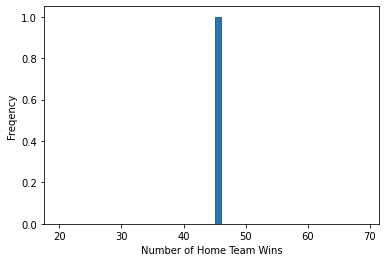

In [4]:
# The following takes the code from above that simulates one season and puts it into a function so we can use it multiple times
def one_season():
    season = np.random.choice(game, number_games)
    home_team_wins = np.count_nonzero(season == 'win')
    return home_team_wins

# Create the histogram from the results of running the one_season function:
plt.hist(one_season(), bins = np.arange(20, 70, 1), edgecolor='black', linewidth=0.5) # x-axis has range 20-70 and the width of a bin is 1
plt.xlabel('Number of Home Team Wins')
plt.ylabel('Freqency')
plt.show()

## Simulating Multiple Seasons

The above histogram isn't very helpful because it only shows the results of one season. Simulations are most useful when you run them many times.
We need to simulate the results of many seasons to get an idea of the probability of the home team winning a certain number of games, 49 in this case. The following code uses a `for loop` to run the simulation however many times we want. Change the code to simulate the following, ending with 10,000 seasons:

- 5 seasons
- 20 seasons
- 100 seasons
- 1,000 seasons
- 10,000 seasons

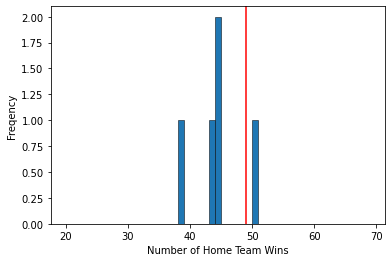

In [6]:
num_seasons = 5   # number of seasons

simulation = np.array([]) # empty list to hold results of each season

for i in np.arange(num_seasons):   # repeat the process num_seasons times
    new_value = one_season()  # simulate 88 games using the one_season function
    simulation = np.append(simulation, new_value) # add the new season to the list

# Create the histogram
fig, ax = plt.subplots()
plt.hist(simulation, np.arange(20, 70, 1), edgecolor='black', linewidth=0.5)
ax.axvline(49, color='r') # Draw a vertical line at 49 games (what was observed)
plt.xlabel('Number of Home Team Wins')
plt.ylabel('Freqency')
plt.show()


<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width= 20px/> <font size=4> **Journal 4a_B:** Recognizing Patterns</font>

**As you simulate more seasons, what do you notice about the shape of the histogram?**

> Write your answer here!

## What are the chances?

<img src = "https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/dice.jpeg?raw=true" width="700"/>

Now that we have data that simulates 10,000 seasons where there is no home court advantage for the home team, we can answer our question:

**In a world where there is no home court advantage, what are the chances that home teams win 49 or more of the 88 games played?**


<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width= 20px/> <font size=4> **Journal 4a_C:** Is your mind changed?</font>

**Based on what you see in the histogram, does the home team winning 49 of the 88 games in a world where there is no home court advantage seem out of the ordinary?**

> Write your answer here!

### Analysis

As you have seen before, data scientists really like to express things in numbers as opposed to words. Therefore we need to answer our driving question with a number:

**In a world where there is no home court advantage, what are the chances that the home teams wins 49 or more of the 88 games played?**

*In other words:*

**What percentage of the simulated seasons had the home team winning 49 or more of the 88 games?**

Complete the following code to perform this calculation.

In [7]:
count = np.count_nonzero(simulation >= 49) # Count the number of simulated seasons where the home team won 49 or more of the games
prop_wins = count/len(simulation) # Calculate the proportion of seasons with 49 or more wins
perc_wins = prop_wins * 100 # Turn the proportion into a percentage
print(f"Proportion of wins: {prop_wins:.4f}\nPercentage of wins: {perc_wins:.2f}%")

Proportion of wins: 0.2000
Percentage of wins: 20.00%


These values are important. They tell us the chances of the home team winning 49 or more games in a world where there is no home court advantage. Data scientists have a special name for this: the **p-value**. It can be expressed as a proportion, like `0.15` or a percentage like `15%`.

### How much is too much?

Remember, we are looking to see if there is enough evidence to **reject** the null hypothesis. The p-value you calculated is how often the home team is expected to win 49 or more games in an 88 game season **in a world where there is no home court advantage**. In order to reject the null hypoothesis, we need to determine if winning 49 games is out of the ordinary. In other words, is winning 49 games really that unusual in a world where there is no home court advantage?

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/pencil.png?raw=true" alt="Drawing" align=left width= 20px/> <font size=4> **Journal 4a_D:** Interpreting the p-value</font>

**Based on your p-value, do you think there is enough evidence to reject the null hypothesis?**

> Write your answer here!

--------------------------------

<br>

<img src="https://github.com/uchicago-dsi/2023-data4all/blob/main/imgs/save-icon.jpeg?raw=true" alt="Drawing" align=left width=20px/> <font size="4">     **&ensp;&ensp;&ensp;Last step: save your work!** </font>

This notebook is based on an example originally developed by https://skewthescript.org/ (Lesson 7.4). We highly recommend their AP Stats and Algebra lessons!

<img src = "https://raw.githubusercontent.com/uchicago-dsi/2023-data4all/main/imgs/skew_the_script.png?raw=true" width="200"/>